In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [16]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
data_ads.shape

(200, 4)

In [18]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [19]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [22]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [23]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [25]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [26]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [27]:
corr_pearson = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [28]:
corr_pearson

0.782224424861606

In [29]:
def correlation_coefficient(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df["corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    
    return corr_pearson

In [30]:
correlation_coefficient(data_ads, "TV", "Sales")

0.782224424861606

In [34]:
cols = data_ads.columns.values

In [37]:
for x in cols:
    for y in cols:
        print(x + ", " + y +" : " + str(correlation_coefficient(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583006
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583006
Radio, Radio : 1.0
Radio, Newspaper : 0.35410375076117545
Radio, Sales : 0.576222574571055
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.35410375076117545
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616534
Sales, TV : 0.782224424861606
Sales, Radio : 0.576222574571055
Sales, Newspaper : 0.22829902637616534
Sales, Sales : 1.0


0.782224424861606

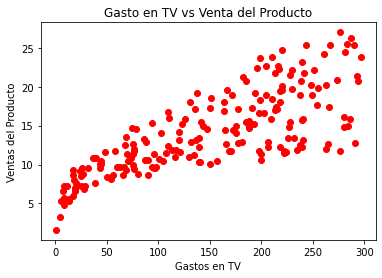

In [53]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Venta del Producto")
plt.xlabel("Gastos en TV")
plt.ylabel("Ventas del Producto")
correlation_coefficient(data_ads, "TV", "Sales")

0.576222574571055

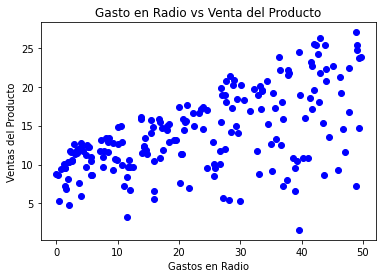

In [60]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "bo")
plt.title("Gasto en Radio vs Venta del Producto")
plt.xlabel("Gastos en Radio")
plt.ylabel("Ventas del Producto")
correlation_coefficient(data_ads, "Radio", "Sales")

0.22829902637616534

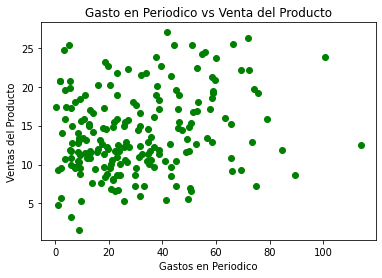

In [61]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "go")
plt.title("Gasto en Periodico vs Venta del Producto")
plt.xlabel("Gastos en Periodico")
plt.ylabel("Ventas del Producto")
correlation_coefficient(data_ads, "Newspaper", "Sales")

In [57]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


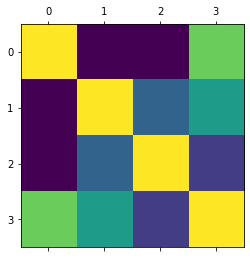

In [59]:
plt.matshow(data_ads.corr())